#0. Introduction

In this project I use Boston house pricing dataset. This dataset describes properties of houses in Boston suburbs and is concerned with modeling the price of houses in those suburbs in thousands of dollars.
There are 13 input variables that describe the properties of a given Boston suburb. The full list of attributes in this dataset are as follow:
- CRIM: per capita crime rate by town.
- ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS: proportion of non-retail business acres per town.
- CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
- NOX: nitric oxides concentration (parts per 10 million).
- RM: average number of rooms per dwelling
- AGE: proportion of owner-occupied units built prior to 1940.
- DIS: weighted distances to five Boston employment centers.
- RAD: index of accessibility to radial highways.
- TAX: full-value property-tax rate per 10,000 dollars
- PTRATIO: pupil-teacher ratio by town.
- B: 1000(Bk − 0.63)2 where Bk is the proportion of blacks by town.
- LSTAT: percentage lower status of the population.
- MEDV: Median value of owner-occupied homes in thousands of dollars.

The outputs that the we use to develop the model are already present in the dataset (MEDV) so this is a **supervised** machine learning problem.
Furthermore, the outputs are continuous variables so it is a **regression** problem. 

In this project I compare the results obtained using a **Linear Regression** model and a **Ridge Regression** model to understand which one best predicts the value of the houses starting from the input data. 


After this I also use a **Random Forest Regressor**l to study if it gives better results than the previous linear models





#1. Importing the libraries

First of all, I import the main libraries necessary for both the computational and the grapchic part of the project

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#2. Importing dataset

In [2]:
from sklearn.datasets import load_boston

#Create a list with column names
names = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']
#Import the dataset
boston_dataset = load_boston()
#Convert the dataset in a Pandas Dataframe with the correct column names
data = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
data['MEDV'] = boston_dataset.target

In [3]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


#3. Relevant features

This dataset has 13 variables which are used to descrive the houses. It is an high number of variables, so it is useful to identify the most useful ones. 
To do this we use **Pearson correlation** which allows us to understand which variables are more correlated with the prices of the houses.

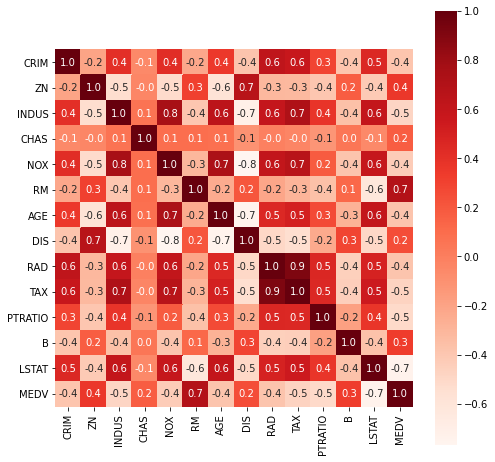

In [4]:
corr = data.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, cbar=True, square= True,fmt='.1f', annot=True, annot_kws={'size':10}, cmap='Reds')

In [6]:
relevant_features = corr["MEDV"].round(3)
# I select as most releveant features the ones whose correlation with MEDV has an absolute value greater than 0.5
relevant_features = relevant_features[(relevant_features > 0.5) | (relevant_features<-0.5)]
relevant_features

RM         0.695
PTRATIO   -0.508
LSTAT     -0.738
MEDV       1.000
Name: MEDV, dtype: float64

RM, PTRATIO and LSTAT are the three variables most correlated with house prices. The sign of correlation is consistent with what we might expect:
- RM: the greater tne number of rooms, the higher the price
- PTRATIO: the loer the pupill-teacher ratio, the better the quality of life in that neighborhood and therefore the higher the price
- LSTAT: small percentage lower status of the population corresponds to a good quality of life which is related to an higher price

In [7]:
data_reduced=data.drop(data.columns[[0,1,2,3,4,6,7,8,9,11]], axis='columns')
data_reduced

,RM,PTRATIO,LSTAT,MEDV
0,6.575,15.3,4.98,24.0
1,6.421,17.8,9.14,21.6
2,7.185,17.8,4.03,34.7
3,6.998,18.7,2.94,33.4
4,7.147,18.7,5.33,36.2
...,...,...,...,...
501,6.593,21.0,9.67,22.4
502,6.120,21.0,9.08,20.6
503,6.976,21.0,5.64,23.9
504,6.794,21.0,6.48,22.0


#4. Data exploration

After selecting the most important variables, I analyze the characteristics of the dataset to see if there are elements that cal lead to any errors 

In [8]:
shape=data_reduced.shape
types=data_reduced.dtypes
shape
types

RM         float64
PTRATIO    float64
LSTAT      float64
MEDV       float64
dtype: object

In [9]:
data_reduced.isnull().sum()

RM         0
PTRATIO    0
LSTAT      0
MEDV       0
dtype: int64

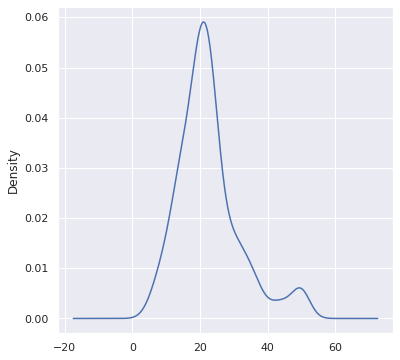

In [11]:
plt.rcParams["figure.figsize"]=[6,6]
sns.set()
data_reduced["MEDV"].plot(kind='density',subplots=True,layout=(1,1),sharex=True)
plt.show()

Analyzing the values of the target (MEDV), there is an unexpected peak in the final tail of the distribution. This means that there are data with excessive values that represent a problem for the analysis and must be eliminated. These data are those that have a value of "MEDV" equal to 50.

In [12]:
n=0
for i in boston_dataset.target:
  if i==50: n+=1
print (n)

16


In [13]:
final_data=data_reduced[data_reduced["MEDV"]!=50]

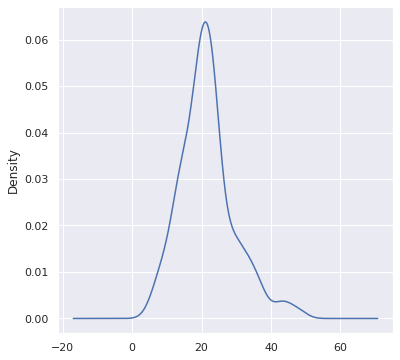

In [14]:
plt.rcParams["figure.figsize"]=[6,6]
final_data["MEDV"].plot(kind='density',subplots=True,layout=(1,1),sharex=True)
plt.show()

In [15]:
from pandas import set_option
set_option('display.width',200)
set_option('display.max_rows',500) #numero massimo di righe da mostrare
set_option('display.max_columns',500) #mumero massimo di colonne da mostrare
set_option('precision',3) #cifre dopo la virgola
description=final_data.describe()
description

,RM,PTRATIO,LSTAT,MEDV
count,490.000,490.00,490.000,490.000
mean,6.245,18.52,12.924,21.636
std,0.653,2.11,7.083,7.865
min,3.561,12.60,1.980,5.000
25%,5.881,17.40,7.348,16.700
50%,6.185,19.10,11.675,20.900
75%,6.578,20.20,17.117,24.675
max,8.780,22.00,37.970,48.800


It is possible to visualize these data more immediately with boxplots

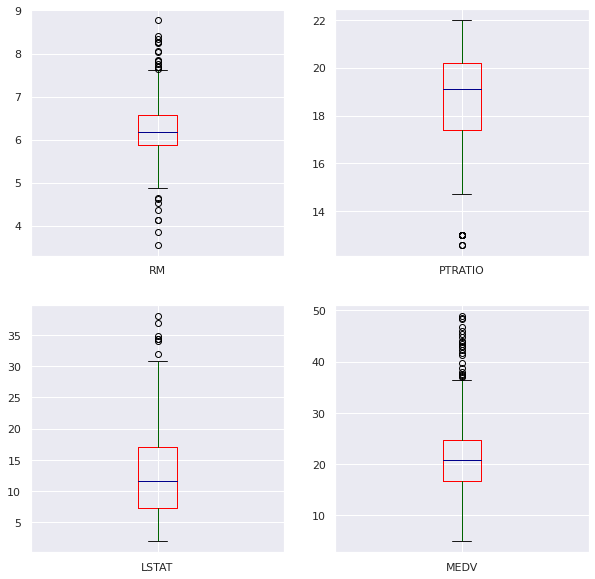

In [16]:
plt.rcParams["figure.figsize"]=[10,10]
color={'boxes':'Red','whiskers':"DarkGreen",'medians':"DarkBlue"}
final_data.plot(kind='box',subplots=True,layout=(2,2),sharex=True,sharey=False,color=color,vert=True)
plt.show()

The following graphs allow us to graphically view the distribution of the variables and the correlation between them

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


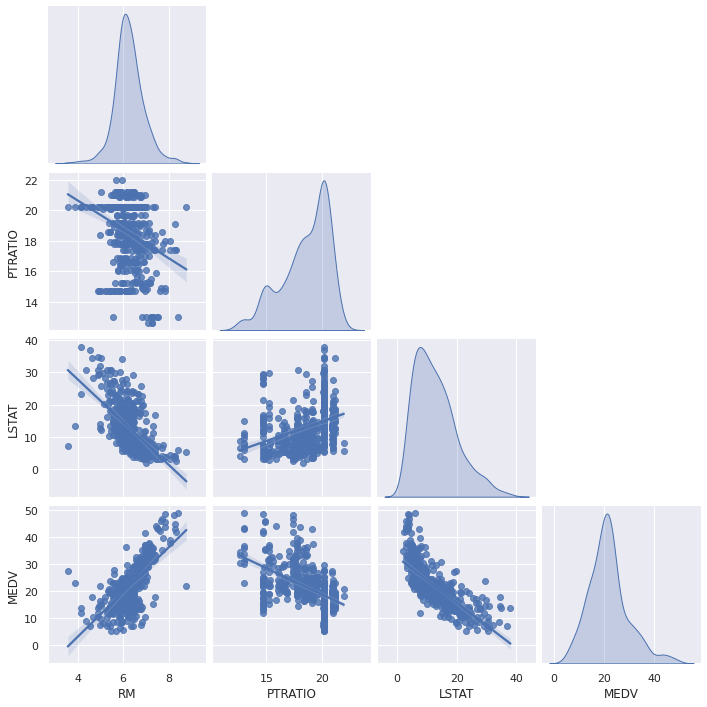

In [17]:
sns.pairplot(final_data,size=2.5,corner=True,diag_kind="kde",kind="reg")

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:1641: FutureWarning: The `data2` param is now named `y`; please update your code
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:1678: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0`, but please update your code.
  warnings.warn(msg, UserWarning)


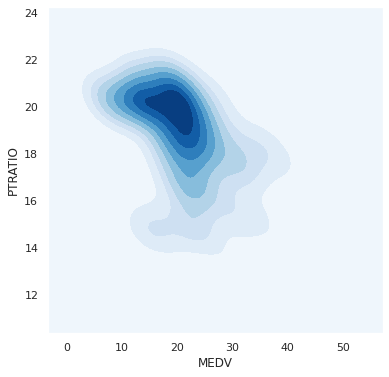

In [18]:
plt.rcParams["figure.figsize"]=[6,6]
sns.kdeplot(final_data["MEDV"],data2=final_data["PTRATIO"],cmap="Blues",shade=True, shade_lowest=True)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:1641: FutureWarning: The `data2` param is now named `y`; please update your code
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:1678: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0`, but please update your code.
  warnings.warn(msg, UserWarning)


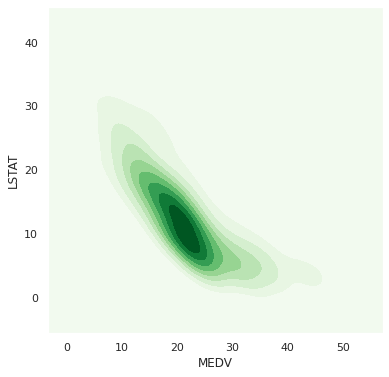

In [19]:
plt.rcParams["figure.figsize"]=[6,6]
sns.kdeplot(final_data["MEDV"],data2=data_reduced["LSTAT"],cmap="Greens",shade=True, shade_lowest=True)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:1678: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0`, but please update your code.
  warnings.warn(msg, UserWarning)


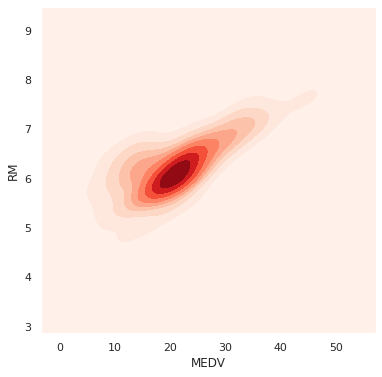

In [20]:
plt.rcParams["figure.figsize"]=[6,6]
sns.kdeplot(final_data["MEDV"],final_data["RM"],cmap="Reds",shade=True, shade_lowest=True)

#5. Model Development

In order to create the models to be studied, it is necessary to divide the dataset into the input variables (X) and the output values (Y)

In [21]:
X = final_data.drop(['MEDV'], axis = 1)
Y = final_data['MEDV']

In [22]:
# Import the libraries needed to evaluate the quality of the models
from sklearn import metrics
from sklearn.model_selection import cross_val_score

##5.1 Linear regression

Linear Regression fits a linear model with coefficients w = (w1, …, wp) to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation.

In [23]:
# Import library for Linear Regression
from sklearn.linear_model import LinearRegression

# Create a Linear regressor
model=LinearRegression()

###Training the model

In [24]:
# Splitting to training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3, random_state = 4)

# Create a Linear regressor
lm = LinearRegression()

# Train the model using the training sets 
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
lm.intercept_

25.239955047706278

In [26]:
coeffcients = pd.DataFrame([X_train.columns,lm.coef_]).T
coeffcients = coeffcients.rename(columns={0: 'Attribute', 1: 'Coefficients'})
coeffcients

,Attribute,Coefficients
0,RM,3.28
1,PTRATIO,-0.937
2,LSTAT,-0.518


The sign of the coefficients in the obtained model  is consistent with the sign of the correlation

I use 3 scores to evaluate the model:
- **R^2**:  represents the coefficient of how well the values fit compared to the original values. The value from 0 to 1 interpreted as percentages. The higher the value is, the better the model is.
- **MAE** (Mean Absolute Error): represents the difference between the original and predicted values extracted by averaged the absolute difference over the data set.
- **RMSE** (Root Mean Squared Error): is the error rate by the square root of the difference between the original and predicted values extracted by squared the average difference over the data set.  

In [27]:
# Model prediction on train data
y_pred = lm.predict(X_train) 

print('R^2:',metrics.r2_score(y_train, y_pred))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.6883348973188271
MAE: 3.198699354187199
RMSE: 4.290518453874758


The obtained value of R^2 is an high value that indicates a good relationship between the predicted values and the real ones

This relationship is also highlighted by the following graphs where the distribution of residuals is also shown


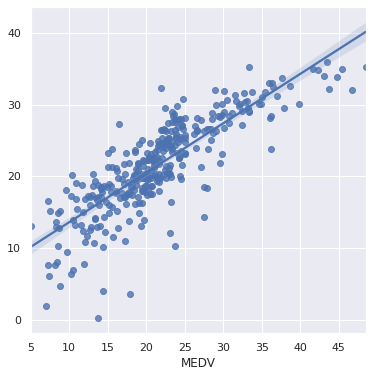

In [28]:
sns.regplot(x=y_train, y=y_pred)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


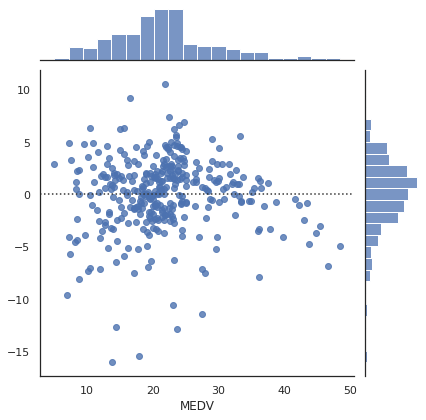

In [29]:
with sns.axes_style('white'):
    sns.jointplot(y_train, y_pred, kind='resid');

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


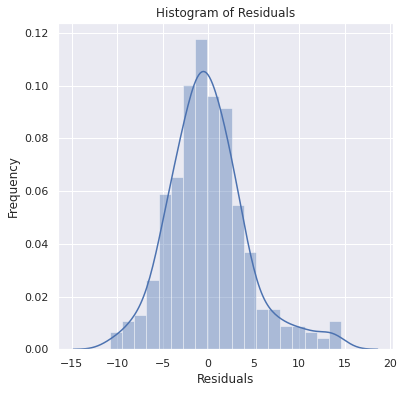

In [30]:
sns.distplot(y_train-y_pred)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

Here the residuals are normally distributed around the value 0. So normality assumption is satisfied



###Testing the model

In [31]:
# Predicting Test data with the model
y_test_pred = lm.predict(X_test)

In [32]:
acc_linreg = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_linreg)
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.7522044218413906
MAE: 3.0806752081984246
RMSE: 4.103712779569333


Here the model evaluations scores are almost matching with that of train data. So the model is not overfitting.

###Training and testing with different seeds

I evaluate the accuracy of the model even with different split, to be sure that the quality of the model is not due to chance (a particular test-train split). 

In [33]:
test_size=0.3
accuracies = [] 

for seed in range(1,10):   
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
    model.fit(X_train, Y_train)             
    result = model.score(X_test, Y_test)  
    output_result = result*100.0
    print("Seed %2d - Accuracy: %.3f%%" % (seed,output_result))   
    accuracies.append(output_result)

Seed  1 - Accuracy: 71.033%
Seed  2 - Accuracy: 68.119%
Seed  3 - Accuracy: 72.178%
Seed  4 - Accuracy: 75.220%
Seed  5 - Accuracy: 74.778%
Seed  6 - Accuracy: 66.565%
Seed  7 - Accuracy: 66.131%
Seed  8 - Accuracy: 73.435%
Seed  9 - Accuracy: 67.994%


The accuracy is high and with similar values for all the considered seeds.

### K-fold Cross Validation

To better evaluate the quality of the model, I use a K-fold Cross Validation.

This method provides train/test indices to split data in train/test sets. Split dataset into k consecutive folds.
Each fold is then used once as a validation while the k - 1 remaining folds form the training set.

In [34]:
from sklearn.model_selection import KFold

In [35]:
# Evaluate using Cross Validation
num_folds = 10
seed = 7

kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)

scores=["r2","neg_mean_absolute_error","neg_root_mean_squared_error"]
names=["R^2","MAE","RMSE"]
for n in range(3):
  if n==0: p=1
  else: p=-1
  results = cross_val_score(model, X, Y, cv=kfold,scoring=scores[n])
  print(names[n],": %.3f (%.3f)" % (p*results.mean(), results.std()))

R^2 : 0.703 (0.064)
MAE : 3.175 (0.424)
RMSE : 4.237 (0.598)


###Repeated random test-train split

The last method to evaluate the quality of the model is a repeated random test-train split with ShuffleSplit module

In [36]:
from sklearn.model_selection import ShuffleSplit 

In [37]:
# Evaluate using Shuffle Split Cross Validation
n_splits = 100
test_size = 0.33
seed = 7

kfold = ShuffleSplit(n_splits=n_splits, test_size=test_size, random_state=seed)
model = LinearRegression()

scores=["r2","neg_mean_absolute_error","neg_root_mean_squared_error"]
names=["R^2","MAE","RMSE"]
for n in range(3):
  if n==0: p=1
  else: p=-1
  results = cross_val_score(model, X, Y, cv=kfold,scoring=scores[n])
  print(names[n],": %.3f (%.3f)" % (p*results.mean(), results.std()))

R^2 : 0.684 (0.045)
MAE : 3.217 (0.181)
RMSE : 4.337 (0.271)


##5.2 Ridge model

Linear least squares with l2 regularization. This model minimizes the objective function:

||y - Xw||^2_2 + alpha * ||w||^2_2

This model solves a regression model where the loss function is the linear least squares function and regularization is given by the l2-norm.

In [38]:
from sklearn.linear_model import Ridge

###Grid search

This model uses the alpha hyperparameter which indicates the regularization strength.

Before using the model on the data, I do a grid search to develop the model with the best possible value of alhpa

In [39]:
from sklearn.model_selection import GridSearchCV 

In [40]:
# Create a Ridge regressor
model=Ridge()

alphas = np.array([10,1.0,0.1, 0.01, 0.001])
param_grid = dict(alpha=alphas)
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid.fit(X, Y)
print(grid.best_score_)
print(grid.best_estimator_.alpha)

0.43226214517552375
10.0


###Training the model

In [41]:
# Splitting to training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3, random_state = 4)

# Create a Ridge regressor with a specific alpha
rd = Ridge(alpha=10)

# Train the model using the training sets 
rd.fit(X_train, y_train)


Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [42]:
y_pred= rd.predict(X_train)

print('R^2:',metrics.r2_score(y_train, y_pred))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.6878798040079674
MAE: 3.2102895069816877
RMSE: 4.293649818214436


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


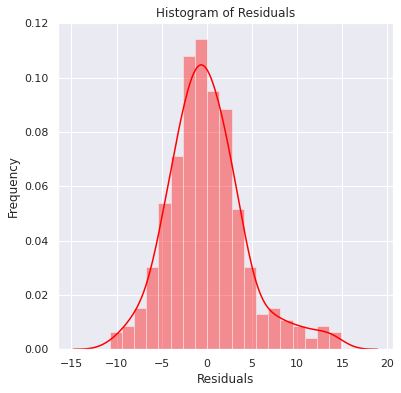

In [43]:
sns.distplot(y_train-y_pred, color="Red")
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

Here the residuals are normally distributed around the value 0. So normality assumption is satisfied

###Testing the model

In [72]:
y_test_pred = rd.predict(X_test)

In [45]:
acc_linreg = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_linreg)
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.7522044218413906
MAE: 3.0806752081984246
RMSE: 4.103712779569333


###Training the model with different seeds

In [46]:
test_size=0.3
accuracies = []   

for seed in range(1,10):   
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
    model = Ridge(alpha=10)            
    model.fit(X_train, Y_train)             
    result = model.score(X_test, Y_test)   
    output_result = result*100.0
    print("Seed %2d - Accuracy: %.3f%%" % (seed,output_result))   
    accuracies.append(output_result)

Seed  1 - Accuracy: 70.894%
Seed  2 - Accuracy: 68.005%
Seed  3 - Accuracy: 71.910%
Seed  4 - Accuracy: 74.662%
Seed  5 - Accuracy: 74.249%
Seed  6 - Accuracy: 66.523%
Seed  7 - Accuracy: 66.612%
Seed  8 - Accuracy: 72.731%
Seed  9 - Accuracy: 67.903%


###K-fold Cross Validation

In [75]:
from sklearn.model_selection import KFold

In [47]:
# Evaluate using Cross Validation
num_folds = 10
seed = 7

kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
model = Ridge(alpha=10)

scores=["r2","neg_mean_absolute_error","neg_root_mean_squared_error"]
names=["R^2","MAE","RMSE"]
for n in range(3):
  if n==0: p=1
  else: p=-1
  results = cross_val_score(model, X, Y, cv=kfold,scoring=scores[n])
  print(names[n],": %.3f (%.3f)" % (p*results.mean(), results.std()))

R^2 : 0.703 (0.060)
MAE : 3.186 (0.415)
RMSE : 4.239 (0.568)


###Repeated Random Test-Train Splits

In [48]:
from sklearn.model_selection import ShuffleSplit  

In [49]:
# Evaluate using Shuffle Split Cross Validation
n_splits = 100
test_size = 0.33
seed = 7

kfold = ShuffleSplit(n_splits=n_splits, test_size=test_size, random_state=seed)
model = Ridge(alpha=10)

scores=["r2","neg_mean_absolute_error","neg_root_mean_squared_error"]
names=["R^2","MAE","RMSE"]
for n in range(3):
  if n==0: p=1
  else: p=-1
  results = cross_val_score(model, X, Y, cv=kfold,scoring=scores[n])
  print(names[n],": %.3f (%.3f)" % (p*results.mean(), results.std()))

R^2 : 0.685 (0.042)
MAE : 3.227 (0.179)
RMSE : 4.333 (0.262)


#6. Comparison

In [50]:
split=["Single train-test","K-fold CV","Repeated random test-train split"]
title=[]
for i in split:
  for n in range(3):
    title.append(i)
name=["R^2","MAE","RMSE"]
val_linear=["0.688","3.199","4.291","0.703 ± 0.064","3.175 ± 0.424",
            "4.237 ± 0.598","0.684 ± 0.045","3.217 ± 0.181","4.337 ± 0.271"]
val_ridge=["0.687","3.210","4.293","0.703 ± 0.060","3.186 ± 0.415",
            "4.239 ± 0.568","0.685 ± 0.042","3.227 ± 0.179","4.333 ± 0.262"]
comparison = pd.DataFrame([title,name*3,val_linear,val_ridge]).T
comparison = comparison.rename(columns={0:"",1: 'Score', 2: 'Linear Model', 3: "Ridge Model"})
comparison

,,Score,Linear Model,Ridge Model
0,Single train-test,R^2,0.688,0.687
1,Single train-test,MAE,3.199,3.210
2,Single train-test,RMSE,4.291,4.293
3,K-fold CV,R^2,0.703 ± 0.064,0.703 ± 0.060
4,K-fold CV,MAE,3.175 ± 0.424,3.186 ± 0.415
5,K-fold CV,RMSE,4.237 ± 0.598,4.239 ± 0.568
6,Repeated random test-train split,R^2,0.684 ± 0.045,0.685 ± 0.042
7,Repeated random test-train split,MAE,3.217 ± 0.181,3.227 ± 0.179
8,Repeated random test-train split,RMSE,4.337 ± 0.271,4.333 ± 0.262


Very similar results are obtained with the two models used. 

With both models a value of R ^ 2 is obtained which indicates a good correlation between predicted data and real data. Furthermore,  in both cases the use of the model on the test set did not show the presence of overfitting

#7 Random Forest Regressor

After evaluating the performance of two linear type models, I use a different type algorithm

A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting


In [51]:
from sklearn.ensemble import RandomForestRegressor

In [52]:
# Splitting to training and testing data
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3, random_state = 4)

##Select best max-depth value

One of the main hyperparamters used in Random Forest is max_depth. It indicates the maximum depth of the tree. If it is not specified, nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
In this case, however, I would have very good results for the training set but with a high risk of overfitting.

So to find the best value for this parameter, I use the model several times by varying its value to find the one that allows to obtain better results on both sets

In [53]:
training=[]
testing=[]
depth=[]

for max_depth in range (1,25):
  reg=RandomForestRegressor(max_depth=max_depth)
  reg.fit(X_train, y_train)
  y_pred = reg.predict(X_train)
  y_test_pred = reg.predict(X_test)
  training.append(metrics.r2_score(y_train, y_pred))
  testing.append( metrics.r2_score(y_test, y_test_pred))
  depth.append(max_depth)


In [54]:
# Insert a initial 0 value in the sesting list to the wo overlapping graphs
testing.insert(0,0)

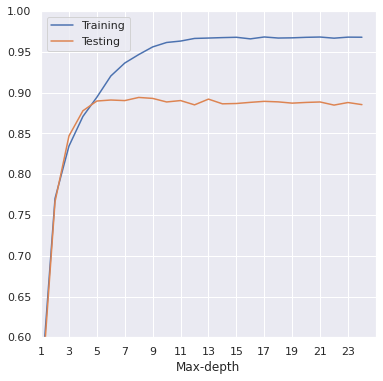

In [55]:
ax = plt.gca()
ax.set_xlabel("Max-depth")
ax.set_ylim([0.6,1.0])
ax.set_xlim([1.0,25])
ax.set_xticks([i for i in range (1,25,2)])
plt.plot(depth,training,testing)
plt.legend(labels=["Training","Testing"])

When the value of max_depth is equal to 9 both scores have reached the maximum of their curve.

Then I narrow the graph to the area of interest in order to better visualize the results

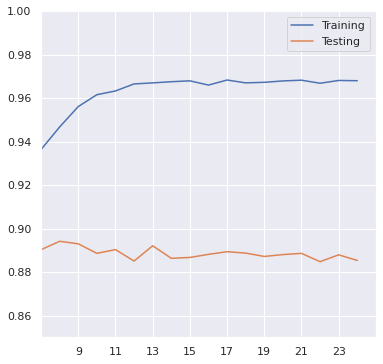

In [56]:
ax = plt.gca()
ax.set_ylim([0.85,1.0])
ax.set_xlim([7.0,25])
ax.set_xticks([i for i in range (9,25,2)])
plt.plot(depth,training,testing)
plt.legend(labels=["Training","Testing"])

I select max_depth=14 because it is the minimum value that allows us to have a maximum score for both sets

##Training the model

In [57]:
# Create a Random Forest Regressor with a specific max_depth
reg = RandomForestRegressor(max_depth=14)
# Train the model using the training sets 
reg.fit(X_train, y_train)

# Model prediction on train data
y_pred = reg.predict(X_train)

print('R^2:',metrics.r2_score(y_train, y_pred))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.96820956659989
MAE: 0.9980603708157814
RMSE: 1.3702944861654025


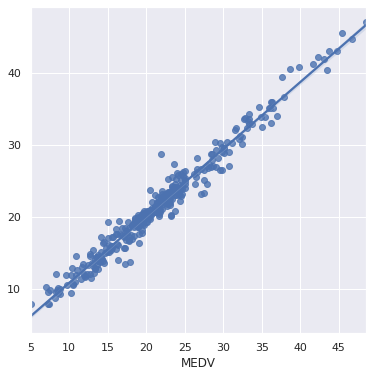

In [60]:
sns.regplot(x=y_train, y=y_pred)
plt.show()

##Testing the model

In [61]:
#Predicting Test data with the model
y_test_pred = reg.predict(X_test)

acc_xgb = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_xgb)
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.8829873179948651
MAE: 2.2079005902504427
RMSE: 2.819984021162353


With this model very good results are obtained and without overfitting

#8. Conclusion

Among the 3 models analyzed the one that gave the best results is the random forest regressor.

With the two linear models similar values are obtained